In [2]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
DATA_PATH  ="hands_on_datasets/breast_cancer.csv"
dataset = pd.read_csv(DATA_PATH)
dataset.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


<AxesSubplot:xlabel='Classification', ylabel='count'>

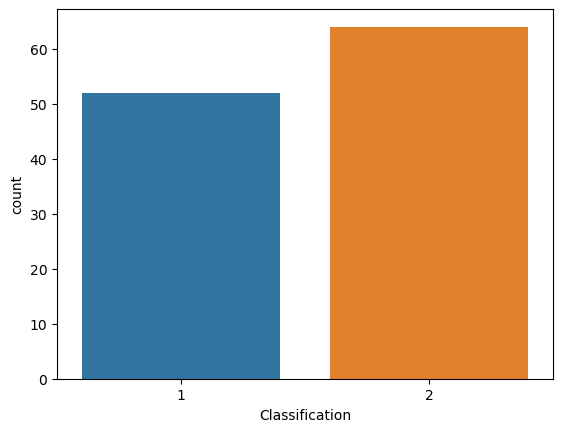

In [4]:
sns.countplot(x=dataset["Classification"])

In [5]:
for col in dataset.columns:
    print(f"{col}:{dataset[col].isnull().sum()}")

Age:0
BMI:0
Glucose:0
Insulin:0
HOMA:0
Leptin:0
Adiponectin:0
Resistin:0
MCP.1:0
Classification:0


In [6]:
for col in dataset.columns:
    print(f"{col}:{dataset[col].isna().sum()}")

Age:0
BMI:0
Glucose:0
Insulin:0
HOMA:0
Leptin:0
Adiponectin:0
Resistin:0
MCP.1:0
Classification:0


In [7]:
le = LabelEncoder()
dataset["Classification"] = le.fit_transform(dataset["Classification"])

<AxesSubplot:>

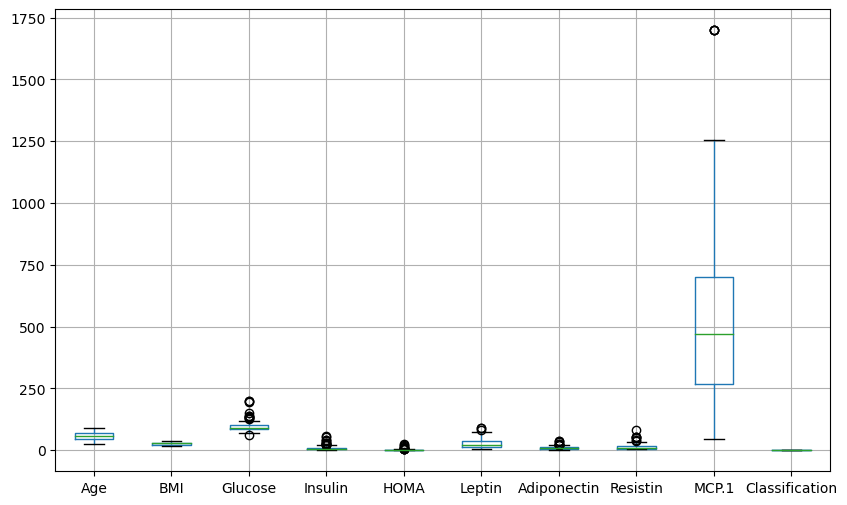

In [8]:
plt.figure(figsize=(10,6))
dataset.boxplot()

In [9]:
dataset[dataset["MCP.1"]>dataset["MCP.1"].describe()["75%"]].count()

Age               29
BMI               29
Glucose           29
Insulin           29
HOMA              29
Leptin            29
Adiponectin       29
Resistin          29
MCP.1             29
Classification    29
dtype: int64

In [10]:
X = dataset.drop("Classification",axis=1)
y = dataset["Classification"].values.reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)


## Base Decision Tree Classifier

In [11]:
dc = DecisionTreeClassifier()
dc.fit(X_train,y_train)
y_pred = dc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)


In [12]:
def custom_confusion_matrix_display(cm):
    condis = ConfusionMatrixDisplay(cm)
    condis.plot(cmap = plt.cm.Blues)
    plt.show()

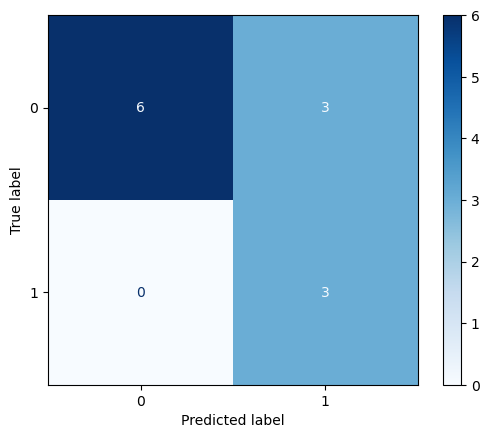

In [13]:
disp_conf = custom_confusion_matrix_display(cm)

## Bagging

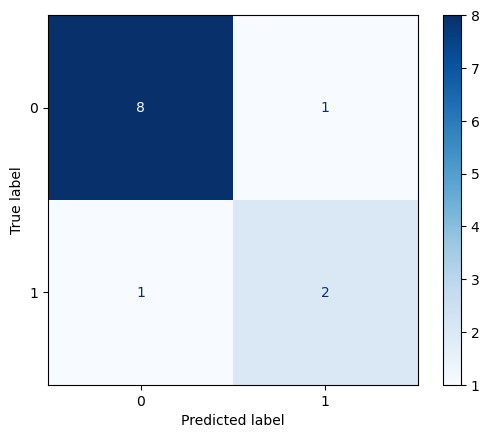

In [14]:
bag_clf = BaggingClassifier()
bag_clf.fit(X_train,y_train.ravel())
bag_pred = bag_clf.predict(X_test)
bag_cm = confusion_matrix(y_test,bag_pred)
custom_confusion_matrix_display(bag_cm)

# Random Forest

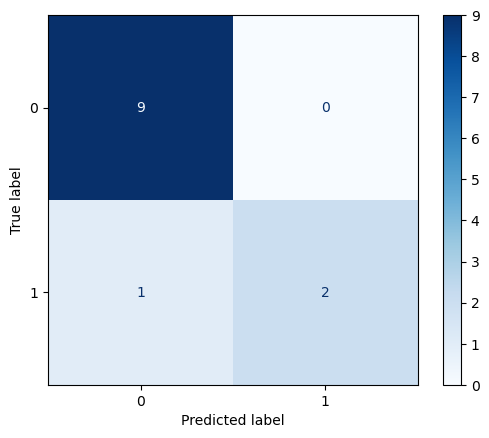

In [15]:
rand_clf = RandomForestClassifier(100)
rand_clf.fit(X_train,y_train.ravel())
rand_pred = rand_clf.predict(X_test)
rand_cm = confusion_matrix(y_test,rand_pred)
custom_confusion_matrix_display(rand_cm)

## Boosting

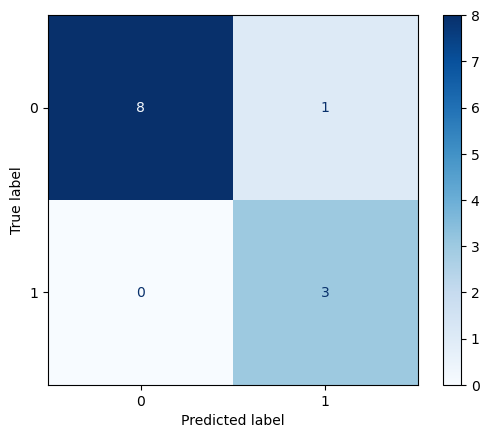

In [16]:
boost_clf = GradientBoostingClassifier()
boost_clf.fit(X_train,y_train.ravel())
boost_pred = boost_clf.predict(X_test)
boost_cm = confusion_matrix(y_test,boost_pred)
custom_confusion_matrix_display(boost_cm)